<font size="7"><center><b>Лабораторная работа №3</b></center></font>
<font size="6"><center><b> $\beta$-распад. Измерение спектра электронов $\beta$-распада.</b></center></font>


<font size="4"> <b> Упражнение 1 </b></font>

В первом упражнении была получена зависимость номера канала детектора от энергии электрона, известная из табличных спектров. Погрешность определения номера канала $\Delta E \approx 25$ кЭв.

In [29]:
import numpy as np
import matplotlib.pyplot as plt
dE = 25
num = np.array([381, 597, 642, 293, 340, 401]) #номера каналов
energy = np.array([624, 976, 1048, 481, 555, 656]) #соответствующие им энергии электронов

Проградуируем спектрометр, определелив коэффициенты зависимости энергии электрона от номера канала $E = AN+B$ с помощью МНК:

In [5]:
matrix = np.vstack([num, np.ones_like(num)]).T
A, B = np.linalg.lstsq(matrix, energy, rcond = None)[0]
print(f'A = {A:.5f}, B = {B:.5f}')

A = 1.62886, B = 2.83610


Погрешности этих коэффициентов определим с помощью формул[1]: 
$$\sigma_A = \Delta N \sqrt{\frac{n}{Z}},$$
$$\sigma_B = \Delta N \sqrt{\frac{\sum N_i^2}{Z}},$$
где $$Z = n\sum N_i^2 - (\sum N_i)^2 $$

In [17]:
Z = num.size*sum(num**2)-(sum(num))**2
sigma_A = dE * (num.size/Z)**0.5
sigma_B = dE * (sum(num**2)/Z)**0.5
sigma_A, sigma_B

(0.07826601605787013, 36.092770233718575)

Итого $A = 1.63\pm 0.08$ кЭв, $B = 3\pm 36 \sim 40$ кЭв.

<font size="4"><b> Упражнение 2 <b></font> 
    
Во втором упражнении на установке был получен спектр электронов $\beta$-распада, и получена аппроксимация для функции Ферми-Кюри этого спектра $Y = \alpha E + \beta$, тогда максимальная энергия электрона при распаде $E_{max} = 738.6\pm 0.2$ кЭв. Однако в силу погрешности градуировки спектрометра $E_{max} = 740\pm 25$ кЭв.
   

In [67]:
alpha = -0.0044726
da = 7e-7
beta = 3.3035
db = 5e-4
print(f'E_max = {-beta/alpha:.2f} +- {-beta/alpha*((db/beta)**2+da**2/alpha**2)**0.5:.2f} kEv')

E_max = 738.61 +- 0.16 kEv


<font size="4"><b> Упражнение 3 <b></font> 
    
Во втором упражнении была получена зависимость интенсивности излучения, проходящего через поглотитель, в зависимости от его толщины:
    

-5.567282678821473 8.239501670127256
x = 0.5460 mm, R(Al) = 0.1474 g/cm^2, Energy = 0.4902 kEv)


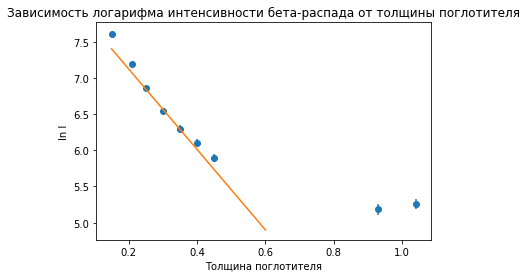

In [71]:
x = np.array([0.78, 0.89, 0.3, 0.25, 0.2, 0.15, 0.1, 0.06, 0])
x+=0.15
Intensity = np.array([178, 192, 362, 448, 545, 699, 951, 1326, 2020])
ln_I = np.array(np.log(Intensity))
error = np.array(Intensity**(-0.5))

x1 = np.array(x[4:7])
ln_I1 = np.array(ln_I[4:7])
matrix = np.vstack([x1, np.ones_like(x1)]).T
A, B = np.linalg.lstsq(matrix, ln_I1, rcond = None)[0]
print(A, B)

"""delta = sum(x**2/error**2) * sum(error**(-2)) - (sum(x/error**2))**2
alpha = (sum(x*ln_I/error**2) * sum(error**(-2)) - sum(x/error**2) * sum(ln_I/error**2) ) / delta
beta = (sum(x**2*ln_I/error**2) * sum(error**(-2)) - sum(x/error**2) * sum(ln_I*x/error**2) ) / delta
print(alpha, beta)""" 
result_x = (5.2-B)/A
R = 2.7 * result_x/10
E = (R/0.4)**(1/1.4)
print(f'x = {result_x:.4f} mm, R(Al) = {R:.4f} g/cm^2, Energy = {E:.4f} kEv)')

plt.errorbar(x, ln_I, yerr = error, fmt = 'none')
plt.scatter(x, ln_I)
#plt.plot([0.15,0.75], [beta+alpha*0.15, beta+alpha*0.75])
plt.plot([0.15,0.6], [B+A*0.15, B+A*0.6])
plt.xlabel('Толщина поглотителя')
plt.ylabel('ln I')
plt.title('Зависимость логарифма интенсивности бета-распада от толщины поглотителя')
plt.show()

<font size="4"><b> Итоги работы </b></font>

1) Проградуирован полупроводниковый спектрометр и получена зависимость энергии электрона от номера канала: <br/>
$E = AN + B$, где $A = 1.63\pm 0.08$ кЭв, $B \sim 40$ кЭв.

2) Измерен спектр $^{204}Tl$ и c помощью графика Ферми-Кюри найдена максимальная энергия электрона при распаде: $E_{max} = 740\pm 25$ кЭв, что совпадает с табличным значением $E = 763$ кЭв.

3) Измерена зависимость интенсивности $\beta$-распада от толщины поглотителя, и по зависимости $\ln I(x)$ была получена оценка экстраполированного пробега электрона в алюминии. И далее с помощью эмпирической формулы для пробега $R(Al) = (0.4E)^{1.4}$ получена оценка максимальной энергии $E = 0.49$ кЭв, которая не совпадает с табличным значением.<br/>
Объяснить это можно недостаточным количеством экспериментальных точек: для определения экстраполированного пробега необходимо получить прямую, апроксимирующую график вблизи выхода на фон, то есть необходимо измерить $I(x)$ для $x$ от 0.5 до 0.8 мм.

4) Ввиду проблем, возникших в последнем методе, можно сделать вывод, что метод с использованием графика Ферми-Кюри лучше метода поглощения.

<font size="4"><b> Ссылки: </b></font>
[1] И. В. Митин, В. С. Русаков. Анализ и обработка экпериментальных